# Thermonuclear Supernova Classification via their Nuclear Signatures

Type Ia supernova or a thermonuclear supernova is a type of supernova beleived to be occuring in a binary star system. In which one star is white dwarf and the other one can be anything ranging from a giant star to  even a smaller white dwarf. The Ia supernova is a subcategory in the Minkowski-Zwicky supernova classification

In [1]:
cd /content/drive/MyDrive/supernova/ 

/content/drive/MyDrive/supernova


# Importing the Necessary Modules

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf
from numpy import asarray
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier

# Reading the Data and augmenting it

In [124]:
data = pd.read_csv('GSOC_Data_DataCube.txt', sep=" ",header=None) # Adding the data with the help of pandas library

In [4]:
ini_mass = list(set(data[8]))
int_rad = list(set(data[9]))
exp_enr = list(set(data[7]))
mass = list(set(data[6]))
t_mass = list(set(data[5]))

In [5]:
for i in range(len(data)):
  data[8][i] = ini_mass.index(data[8][i])
  data[9][i] = int_rad.index(data[9][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#Step 1: Observable Parameters

The parameter $\tau$ has peaks in the 2d plot of its data. Similar peaks are found in the charts of $\phi_{300}$. The $V_{max}$ does not have have value spikes coresponding to that of $\tau$ or $\phi_{300}$

In [7]:
rem = data[[0,2,4]]
rem.columns = [r'$tau$',r'$V_max$',r'$phi_300$'] # Splitting the Observable parameters from the data

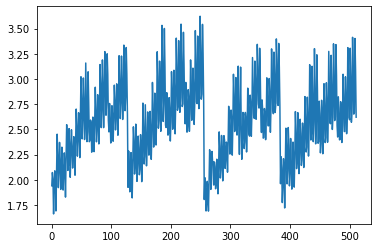

In [8]:
plt.plot(rem['$tau$']) # Presence of Spikes in the chart indidcating an occurence of an event

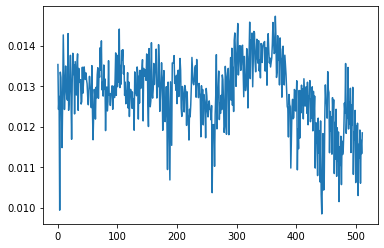

In [ ]:
plt.plot(rem['$V_max$']) #Expansion velocity seems to have less corelation with the peaks in optical depth

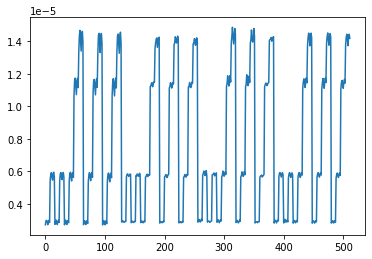

In [ ]:
plt.plot(rem['$phi_300$']) #The emergent flux at 300 days is closely associated with the Intial optical depth plot

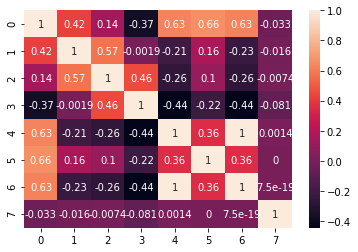

In [ ]:
sns.heatmap(data.corr(), annot = True) # Presence of Negative correaltion under the Vmax col
plt.show()

Presence of spikes on the chart indincating high correlation is further supported by the high correlation value found

In [ ]:
np.corrcoef(rem['$\tau$'],rem['$phi_300$']) # The optical density and the Emergent flux are postively correlated

array([[1.        , 0.63243967],
       [0.63243967, 1.        ]])

# Step 2 Physical Parameters

Features ike explosion energy and total mass are realted with the Observable parameters like $\tau$ , $V_{max}$ and $\phi_{300}$

In [128]:
np.corrcoef(data[0],data[5]) # Correlation of Tau with total

array([[1.        , 0.66339767],
       [0.66339767, 1.        ]])

We can see the features like $\tau$ are correalted with features like Total mass and Mass of ${}^{56}Ni$.

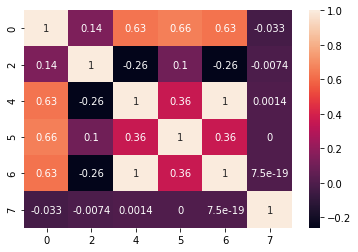

In [129]:
sns.heatmap(data[[0,2,4,5,6,7]].corr(), annot = True)
plt.show()

# Step 3 Classification


Data is split into two variables $x$ and $y$

In [ ]:
rem = data[[0,1,2,3,4]]
rem[[0]] = pd.DataFrame(rem[[1]].values+rem[[0]].values)
rem[[2]] = pd.DataFrame(rem[[2]].values+rem[[3]].values)
rem = rem[[0,2,4]]

X = rem
y = data[[5,6,7]]

For predicting the values we use a MultiOutputRegressor from sklearn library

In [78]:
clf = MultiOutputRegressor(Ridge(random_state=123)).fit(X, y)
clf.predict([X.T[342].values.tolist()])

array([[1.81243923, 0.53612181, 1.35355675]])

For predicting SNela mass distribution flag and Initial ${}^{56}Ni$ radical distribution flag we use a Random Forest Classfier

In [99]:
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X, data[[8,9]].values.astype('float64'))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Testing

In [171]:
def fin_test(tt):
  return clf.predict([tt]).tolist()[0] + [ini_mass[clf_rf.predict([tt])[0][0].astype('int')]] + [int_rad[clf_rf.predict([tt])[0][1].astype('int')]]

In [172]:
#Test Case 1
t_1 = [3.34,0.015,1.20e-5]

In [173]:
fin_test(t_1)

[1.9167007558217226, 0.5866645240728345, 1.3459442524100083, 'N100', 'mwd']

In [174]:
#Test Case 2
t_2 = [2.54,0.013,5.02e-6]

In [175]:
fin_test(t_2)

[1.3530286386057842, 0.31339933033619183, 1.387098840198689, 'hed8', 'w7dt']

In [176]:
#Test Case 3
t_3 = [2.46,0.013,1.03e-5]

In [177]:
fin_test(t_3)

[1.2966612700214228, 0.2860652288398934, 1.391213748789757, 'hed8', 'w7dt']